# pyiron example notebook

This is a placeholder example notebook running and atomistic Lammps job.

In [1]:
from pyiron_feal import Project
import numpy as np

In [2]:
pr = Project("projects/example")

<AxesSubplot:xlabel='$c_\\mathrm{Al}$', ylabel='$E$ [eV/atom]'>

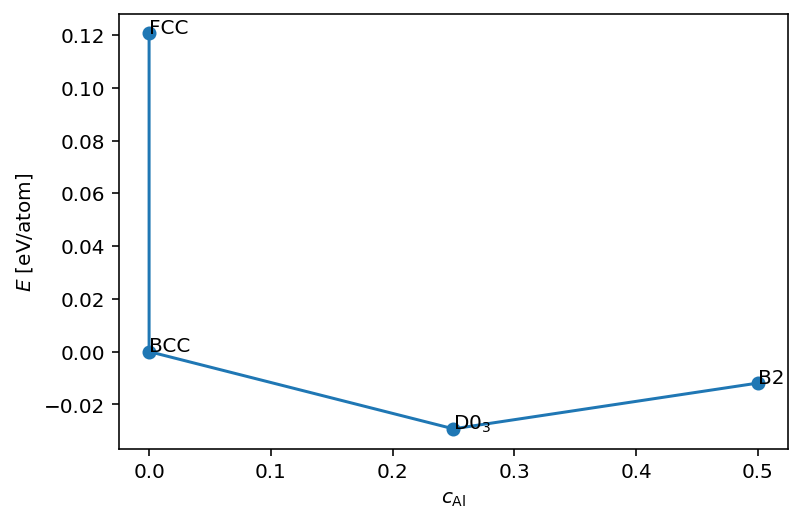

In [3]:
pr.zerok.plot_phases_0K()

In [4]:
rep = 8
solid_solution = pr.create.structure.FeAl.bcc(c_Al=0.18, repeat=rep)
b2 = pr.create.structure.FeAl.b2(repeat=rep)

In [5]:
neighbors = 14
topology = solid_solution.get_neighbors(num_neighbors=neighbors).indices
pr.mcmd_sro.define_clustering(
    reference_environments={'b2': b2.get_chemical_symbols()}, 
    topology=topology,
    threshold=neighbors-3
)

In [6]:
cluster = pr.mcmd_sro.cluster(env=solid_solution.get_chemical_symbols())

In [7]:
solid_solution[[id_ for clust in cluster.data['b2'] for id_ in clust]].plot3d()

NGLWidget()